In [106]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
!pip install yfinance
import yfinance as yf

In [108]:
start='2012-01-01'
end='2023-11-15'

stock='GOOG'

df=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [109]:
df.reset_index(inplace=True)

In [110]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.449753,16.517490,16.127387,16.141480,147611217
1,2012-01-04,16.520704,16.569406,16.331340,16.440361,114989399
2,2012-01-05,16.291538,16.414156,16.222813,16.368669,131808205
3,2012-01-06,16.069294,16.316011,16.063607,16.294997,108119746
4,2012-01-09,15.387978,15.994637,15.357570,15.982275,233776981
...,...,...,...,...,...,...
2982,2023-11-08,132.267944,132.545859,131.176142,131.374650,15093600
2983,2023-11-09,130.709671,132.962777,130.531003,132.367237,17976500
2984,2023-11-10,133.062012,133.270455,129.895757,130.550847,20872900


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        2987 non-null   datetime64[ns]
 1   (Close, GOOG)   2987 non-null   float64       
 2   (High, GOOG)    2987 non-null   float64       
 3   (Low, GOOG)     2987 non-null   float64       
 4   (Open, GOOG)    2987 non-null   float64       
 5   (Volume, GOOG)  2987 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 140.1 KB


In [112]:
df.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
count,2987,2987.000000,2987.000000,2987.000000,2987.000000,2.987000e+03
mean,2017-12-09 06:04:27.559424256,59.483715,60.078611,58.862140,59.451629,4.404821e+07
min,2012-01-03 00:00:00,13.820402,13.955629,13.757857,13.852295,1.584340e+05
25%,2014-12-20 12:00:00,27.811432,28.112844,27.640949,27.886460,2.427100e+07
50%,2017-12-07 00:00:00,50.690311,51.327034,50.144901,50.641672,3.185800e+07
75%,2020-11-24 12:00:00,86.366497,87.553831,85.630506,86.276908,5.132352e+07
max,2023-11-14 00:00:00,149.587082,150.967736,148.771709,150.732986,4.995615e+08
std,NaN,37.965887,38.405133,37.524798,37.940879,3.517537e+07


In [113]:
df.shape

(2987, 6)

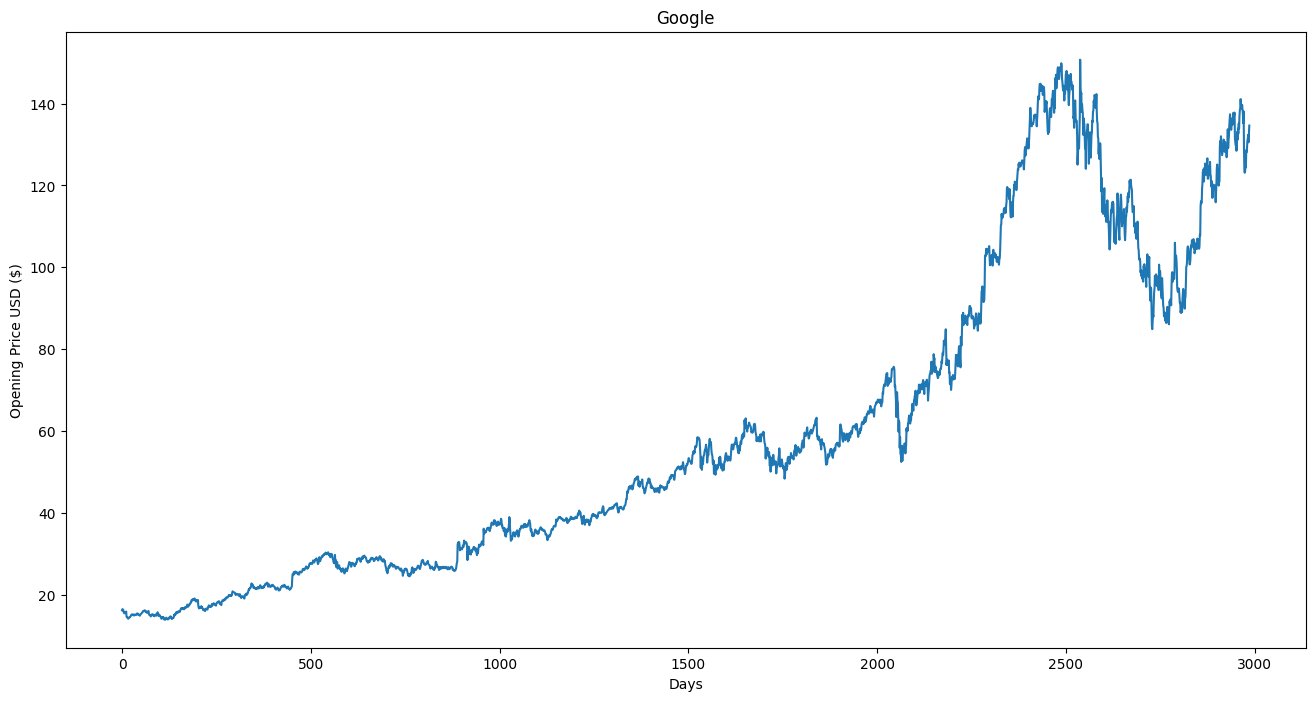

In [114]:
#EDA

# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['Open'])
plt.show()

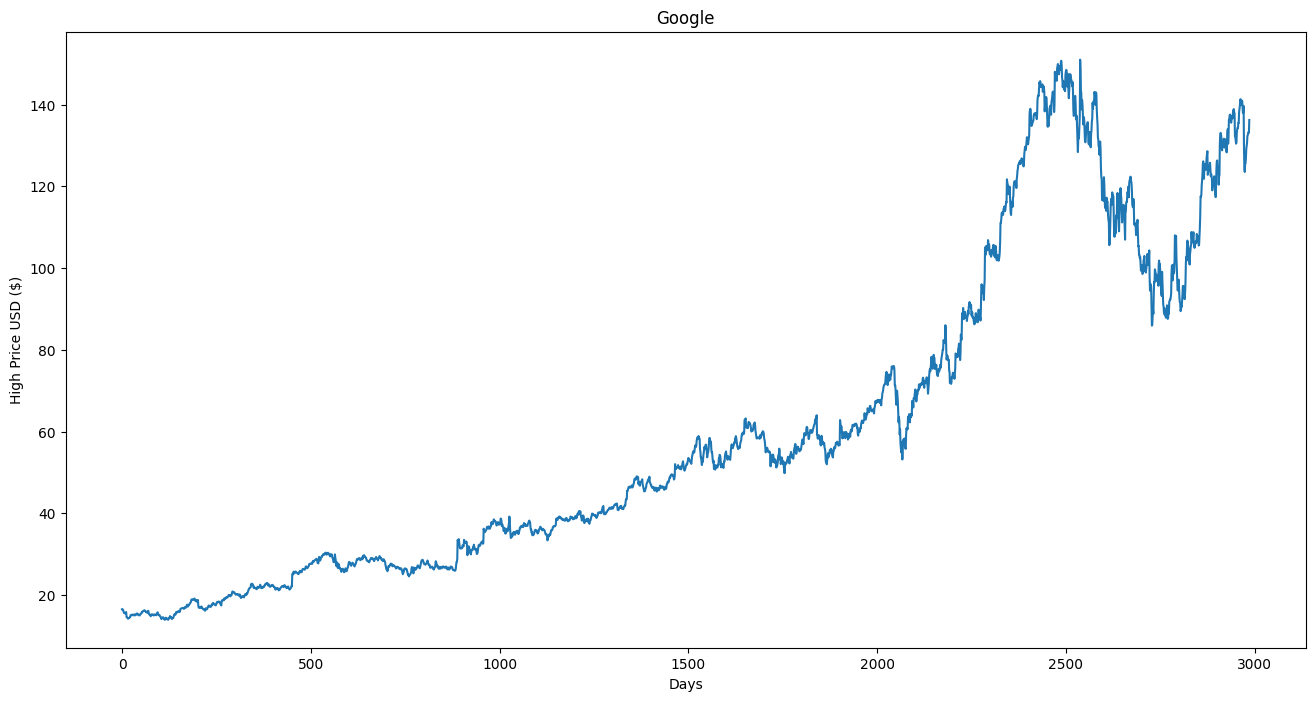

In [115]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['High'])
plt.show()

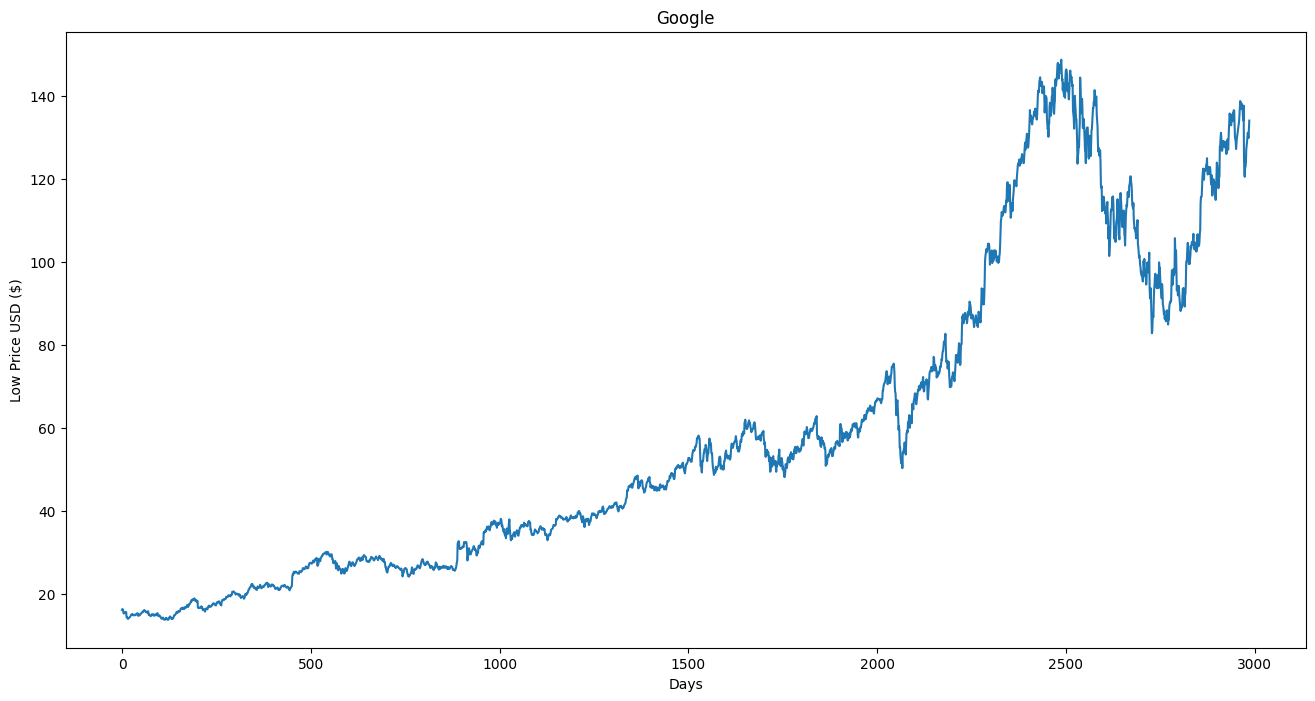

In [116]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['Low'])
plt.show()

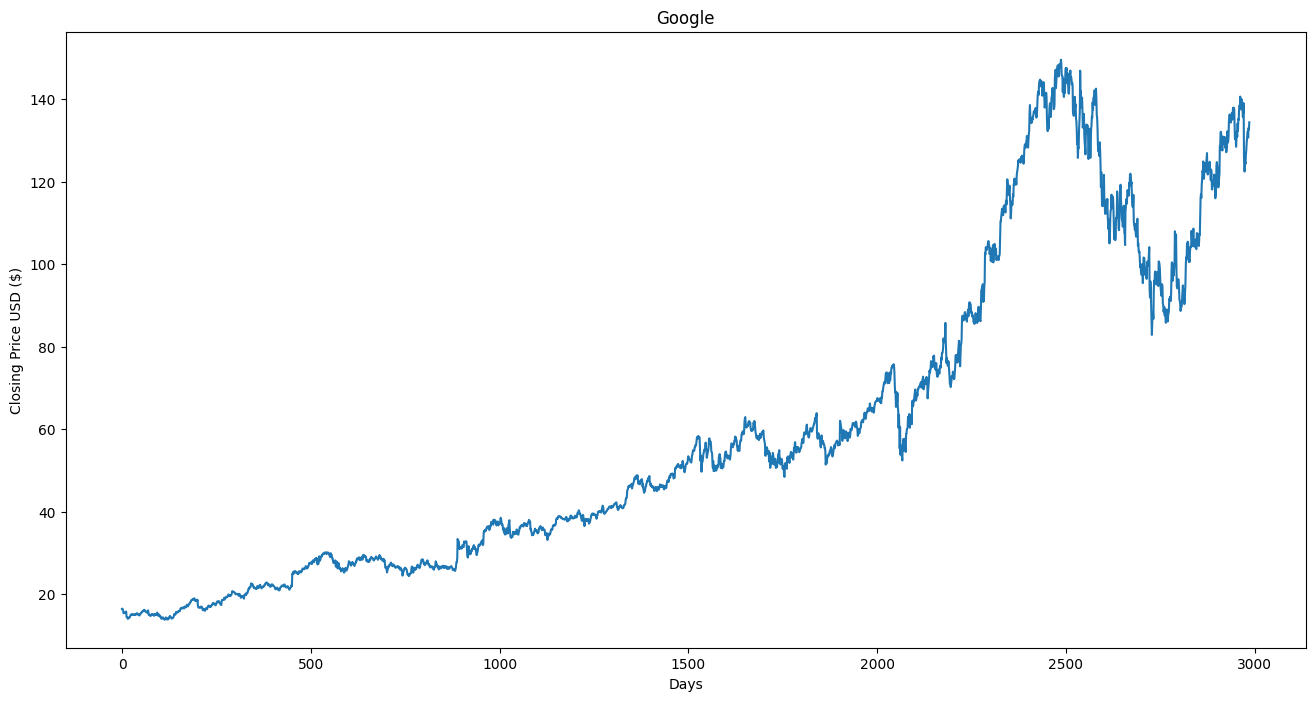

In [117]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [118]:
df2 = df['Close']

In [119]:
df2.tail()

Ticker,GOOG
2982,132.267944
2983,130.709671
2984,133.062012
2985,132.645126
2986,134.421814


In [120]:
df2 = pd.DataFrame(df2)

In [121]:
df2.tail()

Ticker,GOOG
2982,132.267944
2983,130.709671
2984,133.062012
2985,132.645126
2986,134.421814


In [122]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2.iloc[:, 0].shift(-future_days)

In [123]:
df2.tail()

Ticker,GOOG,Prediction
2982,132.267944,NaN
2983,130.709671,NaN
2984,133.062012,NaN
2985,132.645126,NaN
2986,134.421814,NaN


In [124]:
X = np.array(df2.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[ 16.44975281]
 [ 16.52070427]
 [ 16.29153824]
 ...
 [120.3572998 ]
 [122.94787598]
 [122.10420227]]


In [125]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 14.62335014  14.69281578  14.54176807 ... 133.06201172 132.64512634
 134.42181396]


In [126]:
#LINEAR AND DECISION TREE REGRESSION

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [127]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import joblib

In [128]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [129]:
x_future = df2.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[ 99.12654877],
       [100.67492676],
       [107.99005127],
       [104.43671417],
       [102.69972992],
       [107.23571777],
       [ 99.25556183],
       [ 94.74935913],
       [ 94.15383148],
       [ 94.29278564],
       [ 94.24315643],
       [ 96.37714386],
       [ 95.06697845],
       [ 93.88582611],
       [ 91.36475372],
       [ 91.1166153 ],
       [ 90.39204407],
       [ 88.68484497],
       [ 89.42927551],
       [ 89.6277771 ],
       [ 89.83622742],
       [ 91.62281036],
       [ 93.32007599],
       [ 94.86847687],
       [ 93.46895599],
       [ 93.94539642],
       [ 91.97021484],
       [ 90.33248901],
       [ 90.97766113],
       [ 93.54837036],
       [ 95.83126831],
       [100.31759644],
       [101.69725037],
       [101.17119598],
       [105.05208588],
       [103.44415283],
       [105.46897888],
       [105.27045441],
       [102.29278564],
       [100.60543823],
       [101.14143372],
       [100.56573486],
       [103.22579193],
       [104

In [130]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[112.55580521 118.12405396 120.1786499  127.40444946 120.06945801
 119.66251373 121.71709442 120.02976227 119.24564362 115.99997711
 116.83372498  90.33248901 123.90072632 124.76425171 124.12901306
 123.15631104 121.86598206 118.64017487 119.41436768 120.57566071
 121.87591553 128.69476318 128.90318298 132.01983643 120.10419846
 130.90817261 105.46897888 127.81139374 127.58310699 130.95777893
 105.27045441 135.52403259 129.24066162 137.35928345 130.84860229
 129.30023193 128.14888    129.48881531 127.15631104 127.97019958
 137.35928345 138.60494995 129.44911194 129.71710205 133.76176453
 134.48136902 135.91064453 136.32752991 132.1339798  127.40444946
 134.36224365 135.18609619 136.17861938 133.76176453 134.48136902
 136.47640991 137.95532227 137.27046204 136.01585388 137.79650879
 133.58807373 130.3821106  130.27293396 100.02976227 132.1339798
 130.48138428 132.13894653 130.3821106  134.16374207 132.30766296
 135.25556946 134.97764587 137.69723511 138.46151733 138.16375732
 136.873413

In [131]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[102.52427724 104.0539611  111.28076748 107.7703311  106.05431809
 110.53554132 102.65173268  98.19993499  97.61159736  97.74887388
  97.69984386  99.80806689  98.51371958  97.34682771  94.85619314
  94.61105058  93.89522736  92.20863989  92.94408266  93.14018766
  93.34612129  95.11113417  96.7879081   98.31761457  96.93499062
  97.40567881  95.45434431  93.83639134  94.47377406  97.01344619
  99.26878189 103.70094496 105.06394183 104.54423869 108.3782732
 106.78975331 108.79013291 108.59400529 105.652287   103.98531154
 104.51483575 103.94608752 106.57402876 107.46634498 107.67227106
 107.50556899 111.37883506 109.46670196 108.65284885 107.7703311
 110.68262385 111.92794113 108.94700636 107.67227106 107.57420348
 108.43710922 108.4469303  109.30001497 107.17217239 107.01527633
 110.85913192 110.71204939 110.21194319 108.51555726 108.65284885
 107.76051756 108.74598705 110.73164633 110.43748128 114.69317396
 119.22341969 120.22358687 119.28224063 122.35143698 123.71442631
 125.7147983

In [132]:
predictions = tree_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\ab775\AppData\Local\Temp\ipykernel_18328\1911164318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


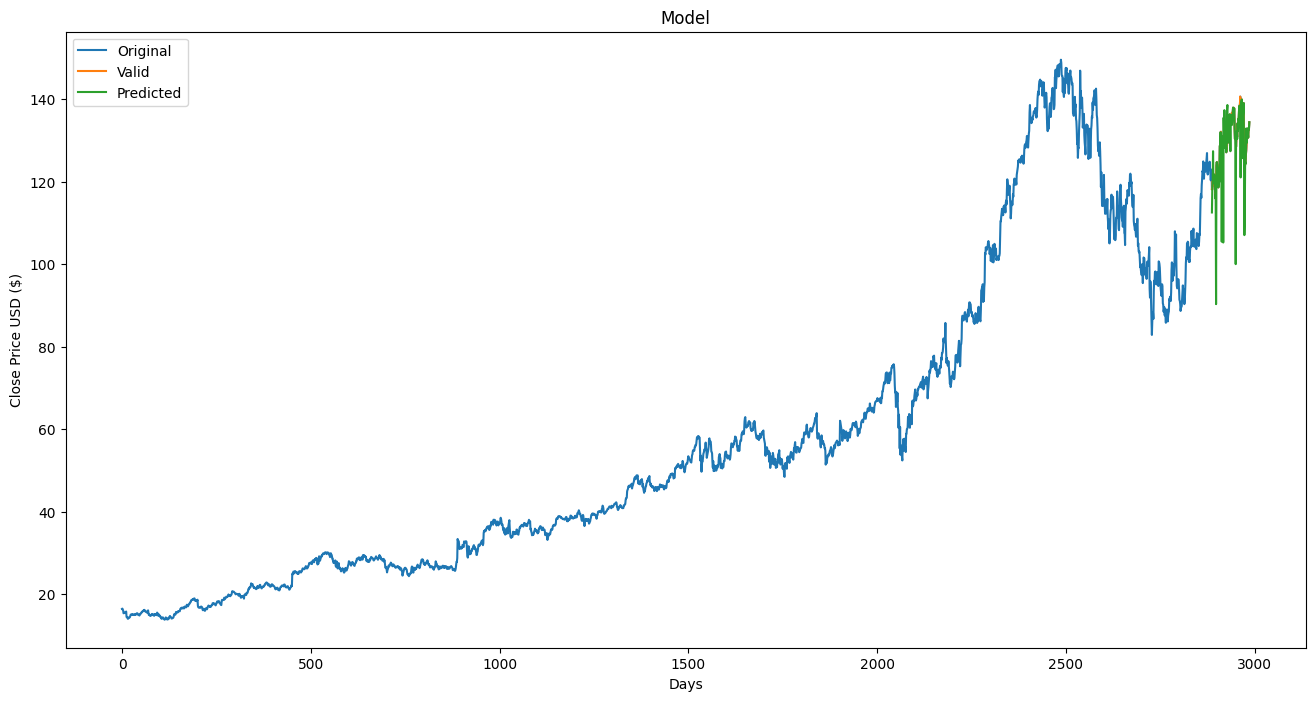

In [133]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2.iloc[:, 0])
plt.plot(valid.iloc[:, 0])
plt.plot(valid['Predictions'])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [134]:
joblib.dump(tree, 'decision_tree_model.joblib')

['decision_tree_model.joblib']